## Battle of the Neighborhoods Capstone

This notebook will be utilized for the "Battle of the Neighborhoods" Capstone Project.  

In [49]:
import pandas as pd
import numpy as np
print('Pandas & Numpy imported successfully.')

Pandas & Numpy imported successfully.


In [50]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Prepare Toronto Data
### Install Libraries

In [51]:
!pip install bs4
!pip install requests
!pip install lxml

from bs4 import BeautifulSoup as bs
import requests
import lxml

print("Installed!")



Installed!


### Scrape the Toronto postal codes

In [52]:
url_zip = "https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&direction=prev&oldid=926287641"

data_zip  = requests.get(url_zip).text

soupzip = bs(data_zip,"html5lib")

tablezip = soupzip.find_all('table') # in html table is represented by the tag <table>

print('Tables found.')

Tables found.


### Specify the table

In [53]:
zip_table = soupzip.find_all('table')[0]
print(zip_table)


<table class="wikitable sortable">
<tbody><tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
</td></tr>
<tr>
<td>M4A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a class="mw-redirect" href="/wiki/Harbourfront_(Toronto)" title="Harbourfront (Toronto)">Harbourfront</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Regent_Park" title="Regent Park">Regent Park</a>
</td></t

### Read the table into a DataFrame

In [54]:
zip_df = pd.DataFrame(columns=["PostCode", "Borough", "Neighborhood"])

for row in zip_table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    if (col != []):

    
        pstcd = col[0].text.strip()
        boro = col[1].text.strip()
        hood = col[2].text.strip()
    
    
        zip_df = zip_df.append({"PostCode": pstcd, "Borough": boro, "Neighborhood": hood}, ignore_index=True)

zip_df

,PostCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


### Remove Boroughs that have "Not assigned" values

In [55]:
clear_df = zip_df[zip_df.Borough != 'Not assigned']
clear_df

,PostCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


### Replace Neighborhood with Borough if Neighborhood is "Not assigned"

In [85]:
clear_df['Neighborhood'] = np.where(clear_df['Neighborhood'] == 'Not assigned', clear_df['Borough'], clear_df['Neighborhood'])
clear_df

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,PostCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Queen's Park
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


### Groupby PostCode, separate Neighborhoods by comma.

In [86]:
grouped_df = clear_df.groupby(["PostCode", "Borough"])["Neighborhood"].apply(list)
grouped_df = grouped_df.sample(frac=1).reset_index()
grouped_df["Neighborhood"]= grouped_df["Neighborhood"].str.join(', ')
grouped_df


,PostCode,Borough,Neighborhood
0,M5C,Downtown Toronto,St. James Town
1,M2L,North York,"Silver Hills, York Mills"
2,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
3,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
4,M1V,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St..."
5,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village"
6,M3J,North York,"Northwood Park, York University"
7,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
8,M4C,East York,Woodbine Heights
9,M5K,Downtown Toronto,"Design Exchange, Toronto Dominion Centre"


### Display the dataframe shape

In [58]:
grouped_df.shape

(103, 3)

### Install Geocoder

In [59]:
!pip install geocoder
import geocoder

### Obtain Latitude & Longitude for each Postal Code

In [60]:
latitude=[]
longitude=[]
for code in grouped_df['PostCode']:
    g = geocoder.arcgis('{}, Toronto, Ontario'.format(code))
    print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(code))
        print(code, g.latlng)
    latlng = g.latlng
    latitude.append(latlng[0])
    longitude.append(latlng[1])

M6S [43.649820000000034, -79.47547999999995]
M4N [43.72843000000006, -79.38712999999996]
M5E [43.64536000000004, -79.37305999999995]
M1X [43.83412000000004, -79.21667999999994]
M4X [43.667880000000025, -79.36648999999994]
M1E [43.765750000000025, -79.17469999999997]
M4G [43.709020000000066, -79.36348999999996]
M5C [43.65215000000006, -79.37586999999996]
M1N [43.695100000000025, -79.26465999999994]
M1T [43.784910000000025, -79.29721999999998]
M3H [43.75788000000006, -79.44846999999999]
M7Y [43.648690000000045, -79.38543999999996]
M2P [43.747780000000034, -79.40032999999994]
M4Y [43.66659000000004, -79.38132999999993]
M4L [43.667970000000025, -79.31466999999998]
M6N [43.67646000000008, -79.48271999999997]
M2H [43.80225000000007, -79.35557999999997]
M1C [43.78574000000003, -79.15874999999994]
M6R [43.64777000000004, -79.44988999999998]
M4S [43.703400000000045, -79.38658999999996]
M1W [43.80079000000006, -79.32161999999994]
M6J [43.64848000000006, -79.41773999999998]
M5L [43.64840000000004

### Append the Latitude & Longitude to the dataframe. Display first dozen rows.

In [87]:
grouped_df['Latitude'] = latitude
grouped_df['Longitude'] = longitude
grouped_df

,PostCode,Borough,Neighborhood,Latitude,Longitude
0,M5C,Downtown Toronto,St. James Town,43.65609,-79.38493
1,M2L,North York,"Silver Hills, York Mills",43.65609,-79.38493
2,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.65609,-79.38493
3,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.65609,-79.38493
4,M1V,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St...",43.65609,-79.38493
5,M6K,West Toronto,"Brockton, Exhibition Place, Parkdale Village",43.65609,-79.38493
6,M3J,North York,"Northwood Park, York University",43.65609,-79.38493
7,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.65609,-79.38493
8,M4C,East York,Woodbine Heights,43.65609,-79.38493
9,M5K,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.65609,-79.38493


## Segmenting and Clustering Neighborhoods in Toronto
### Install Libraries

In [62]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-main==custom=2155
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37ha70c682_1
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2155
done

# All requested packages already installed.

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::ibm-wsrt-py37main-main==custom=2155
  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37ha70c682_1
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2155
done

# All requested packages already installed.

Libraries imported.


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from pandas.io.json import json_normalize 

print('Libraries imported.')

Libraries imported.


### Create a group of the Lats & Longs 

In [88]:
X= grouped_df.loc[:,['PostCode','Latitude','Longitude']]
X

,PostCode,Latitude,Longitude
0,M5C,43.65609,-79.38493
1,M2L,43.65609,-79.38493
2,M1C,43.65609,-79.38493
3,M1L,43.65609,-79.38493
4,M1V,43.65609,-79.38493
5,M6K,43.65609,-79.38493
6,M3J,43.65609,-79.38493
7,M8X,43.65609,-79.38493
8,M4C,43.65609,-79.38493
9,M5K,43.65609,-79.38493


### The elbow of the K's for KMeans show how many clusters to create

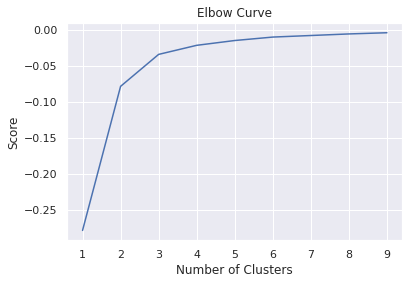

In [65]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = grouped_df[['Latitude']]
X_axis = grouped_df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### There appears to be an elbow at 3 clusters

### Map of Toronto prior to clustering

In [67]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for latitude, longitude, pstcd, boro, hood in zip(grouped_df['Latitude'], grouped_df['Longitude'], grouped_df['PostCode'], grouped_df['Borough'], grouped_df['Neighborhood']):
    label = '{}, {}'.format(hood, boro)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Add Cluster Labels to Lats/Longs Dataframe, with 3 clusters from the elbow above

In [89]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) 
X['Cluster Labels'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(X[X.columns[1:3]]) 
X

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  from ipykernel import kernelapp as app
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1105: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight)._transform(X)


,PostCode,Latitude,Longitude,Cluster Labels
0,M5C,43.65609,-79.38493,0
1,M2L,43.65609,-79.38493,0
2,M1C,43.65609,-79.38493,0
3,M1L,43.65609,-79.38493,0
4,M1V,43.65609,-79.38493,0
5,M6K,43.65609,-79.38493,0
6,M3J,43.65609,-79.38493,0
7,M8X,43.65609,-79.38493,0
8,M4C,43.65609,-79.38493,0
9,M5K,43.65609,-79.38493,0


In [79]:
ts_df = X.drop(['cluster_label'], axis=1)
ts_df

,PostCode,Latitude,Longitude,Cluster Labels
0,M6S,43.64982,-79.47548,0
1,M4N,43.72843,-79.38713,1
2,M5E,43.64536,-79.37306,1
3,M1X,43.83412,-79.21668,2
4,M4X,43.66788,-79.36649,1
5,M1E,43.76575,-79.17470,2
6,M4G,43.70902,-79.36349,1
7,M5C,43.65215,-79.37587,1
8,M1N,43.69510,-79.26466,2
9,M1T,43.78491,-79.29722,2


### Add the Borough and Neighborhoods to the Cluster dataframe

In [90]:
ts_df['Borough'] = grouped_df['Borough']
ts_df['Neighborhood'] = grouped_df['Neighborhood']
    
ts_df

,PostCode,Latitude,Longitude,Cluster Labels,Borough,Neighborhood
0,M6S,43.64982,-79.47548,0,Downtown Toronto,St. James Town
1,M4N,43.72843,-79.38713,1,North York,"Silver Hills, York Mills"
2,M5E,43.64536,-79.37306,1,Scarborough,"Highland Creek, Rouge Hill, Port Union"
3,M1X,43.83412,-79.21668,2,Scarborough,"Clairlea, Golden Mile, Oakridge"
4,M4X,43.66788,-79.36649,1,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St..."
5,M1E,43.76575,-79.17470,2,West Toronto,"Brockton, Exhibition Place, Parkdale Village"
6,M4G,43.70902,-79.36349,1,North York,"Northwood Park, York University"
7,M5C,43.65215,-79.37587,1,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
8,M1N,43.69510,-79.26466,2,East York,Woodbine Heights
9,M1T,43.78491,-79.29722,2,Downtown Toronto,"Design Exchange, Toronto Dominion Centre"


### Map the clusters of Toronto

In [83]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ts_df['Latitude'], ts_df['Longitude'], ts_df['Neighborhood'], ts_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters